# Домашнее задание № 4 оцениваемое (NLTP & Matplotlib)

## Крылов Дмитрий, БФИЛЛ-162

### Задание 1.

1. Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом.

2. Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл. Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д.

3. Очистите текст от стоп-слов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

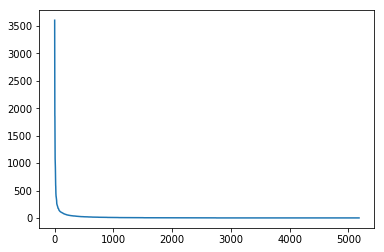

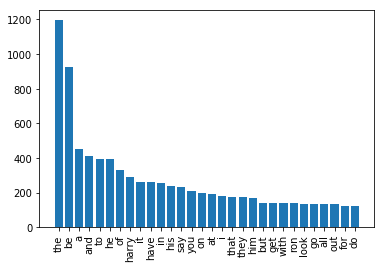

In [42]:
with open ('C:\\Users\\Arseny\\Desktop\\repository\\txts 4 python\\Harry_Potter_and_the_Sorcerers_Stone.txt', 'r', encoding = 'utf-8') as hpatps:
    hpatps = hpatps.read() #Task 1
hpatps = hpatps.lower()

#Lowercased

import re
punct = "!\"#$%&()*+,-./:;<=>?@[\]^_`{|}~„“«»†*—/"
all_words = hpatps.split()
depuncted = []
for word in all_words:
    word = word.strip(punct)
    depuncted.append(word)

#Cleared of punctuation

from nltk import WordNetLemmatizer
wnl = WordNetLemmatizer()
lmtzd = [wnl.lemmatize(word, pos = 'v') for word in depuncted]
lmtzd = []
for word in depuncted:
    word = wnl.lemmatize(word, pos = 'v')
    word = wnl.lemmatize(word, pos = 'n')
    lmtzd.append(word)

#Lemmatized

hpatps = ' '.join(lmtzd)
with open ('C:\\Users\\Arseny\\Desktop\\repository\\txts 4 python\\new_file.txt', 'w', encoding = 'utf-8') as new:
    new.write(hpatps)

#Written as a new file.    

d ={}
for word in hpatps.split():
    if word not in d:
        d[word] = 1
    else:
        d[word] += 1
sorting = sorted(d.items(), key = lambda x: x[1], reverse = True)
Y = [x[1] for x in sorting]
X = []
for i in range (1, len(d)+1):
    X.append(i)
import matplotlib.pyplot as plt #Task 2
plt.plot(X,Y)
plt.show()

#Zipf's law in depiction. 

from nltk.corpus import stopwords
sw = stopwords.words('english')
filtered_y = [s[1] for s in sorting if s[0] not in sw]

#stop-words deleted

new_y = filtered_y[:30]
new_x = [i for i in range(0, 30)]
plt.xticks(new_x, [s[0] for s in sorting[:30]], rotation=90)
plt.bar(new_x, new_y)
plt.show()

#Task 3